In [ ]:
import pandas as pd

df_house = pd.read_csv("house_price_data.csv")

print(f"Loaded dataset with shape: {df_house.shape}")
df_house.head()


Loaded dataset with shape: (8000, 25)


,property_id,neighborhood,distance_to_city_center,distance_to_metro,distance_to_school,crime_rate,house_age,total_area,bedrooms,bathrooms,...,construction_quality,renovation_status,heating_type,air_conditioning,parking_spaces,energy_efficiency,listing_duration,season_sold,year_sold,sale_price
0,PROP_000001,Forest Glen,6.6,908,296,1.0,22,103,3,3,...,Basic,Full,Gas,0,2,D,1,Winter,2022,342.8
1,PROP_000002,Lakeside,2.6,84,30,1.0,12,114,2,2,...,Standard,Never,Gas,1,0,A,17,Fall,2023,545.0
2,PROP_000003,Downtown,10.2,50,120,1.0,21,83,5,3,...,Premium,Never,Central,1,1,C,4,Summer,2021,710.1
3,PROP_000004,Riverside,5.1,475,48,1.0,0,127,3,1,...,Standard,Full,Central,1,1,D,55,Winter,2023,894.5
4,PROP_000005,Oakwood,0.5,647,111,1.0,21,59,6,2,...,Standard,Never,Central,0,0,C,15,Fall,2023,258.4


Dataset Shape: 8000 rows × 25 columns
Memory Usage: 4.50 MB

Data Types Distribution:
  int64: 15 columns
  object: 7 columns
  float64: 3 columns

Missing Values: 0 total
Duplicate Rows: 0

Target Variable Statistics:
Mean: $725.18
Median: $684.60
Standard Deviation: $350.86
Skewness: 0.073


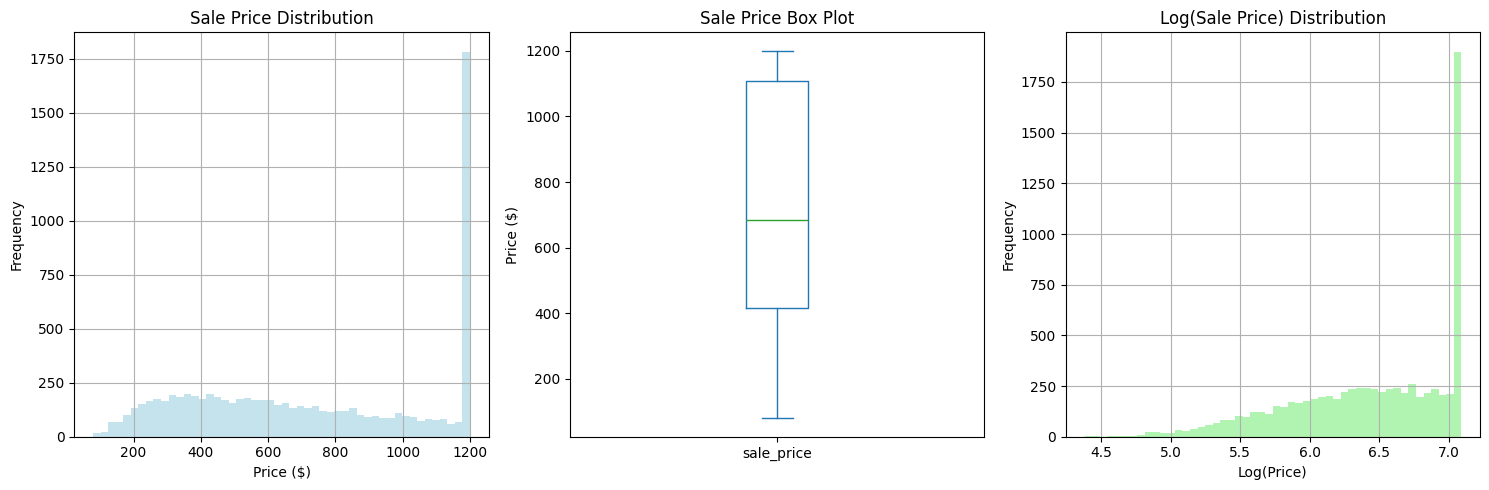


Analyzing features: ['distance_to_city_center', 'distance_to_metro', 'distance_to_school', 'house_age', 'total_area', 'listing_duration']


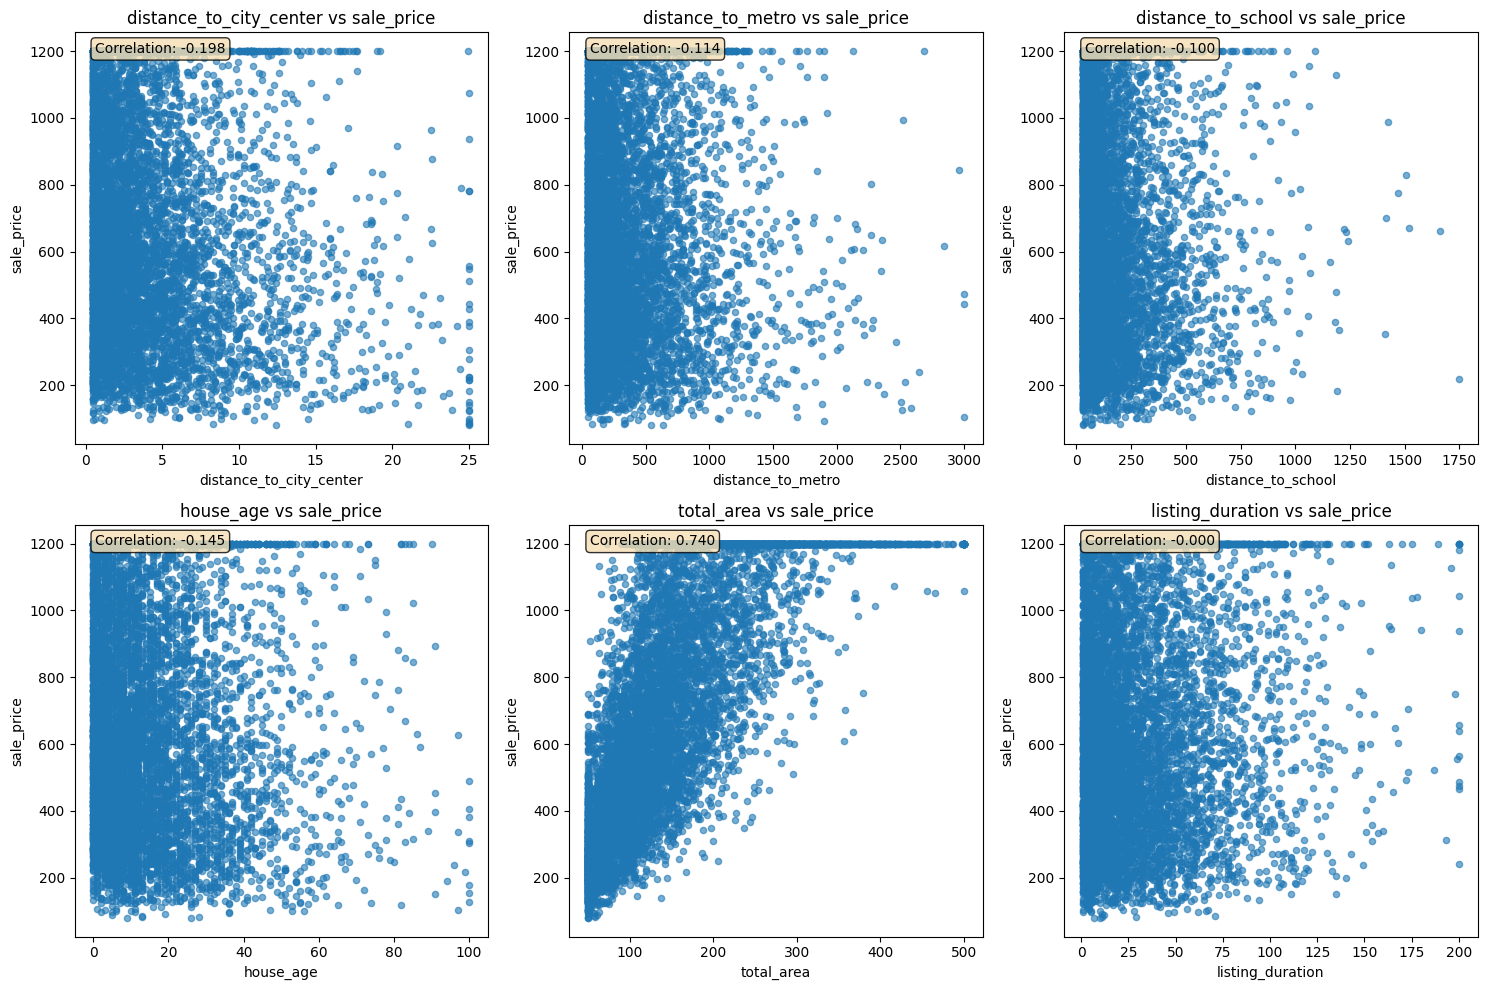

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset info
print(f"Dataset Shape: {df_house.shape[0]} rows × {df_house.shape[1]} columns")
print(f"Memory Usage: {df_house.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")

print("Data Types Distribution:")
for dtype, count in df_house.dtypes.value_counts().items():
    print(f"  {dtype}: {count} columns")

print(f"\nMissing Values: {df_house.isnull().sum().sum()} total")
print(f"Duplicate Rows: {df_house.duplicated().sum()}")

# Target variable
target = 'sale_price'

print(f"\nTarget Variable Statistics:")
print(f"Mean: ${df_house[target].mean():,.2f}")
print(f"Median: ${df_house[target].median():,.2f}")
print(f"Standard Deviation: ${df_house[target].std():,.2f}")
print(f"Skewness: {df_house[target].skew():.3f}")

# Target distribution plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df_house[target].hist(bins=50, ax=axes[0], alpha=0.7, color='lightblue')
axes[0].set_title('Sale Price Distribution')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

df_house[target].plot.box(ax=axes[1])
axes[1].set_title('Sale Price Box Plot')
axes[1].set_ylabel('Price ($)')

np.log(df_house[target]).hist(bins=50, ax=axes[2], alpha=0.7, color='lightgreen')
axes[2].set_title('Log(Sale Price) Distribution')
axes[2].set_xlabel('Log(Price)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Automatically find numeric features
numeric_features = df_house.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove(target)  # exclude target

# Columns to exclude from scatter plots
exclude_cols = [
    'crime_rate', 'bedrooms', 'bathrooms', 'floors', 'garage', 'balcony',
    'air_conditioning', 'parking_spaces', 'year_sold', 'garden', 'basement'
]

numeric_features = [col for col in numeric_features if col not in exclude_cols]
print(f"\nAnalyzing features: {numeric_features}")

# Create scatter plots for remaining numeric features
rows = (len(numeric_features) + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    df_house.plot.scatter(x=feature, y=target, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{feature} vs {target}')
    corr = df_house[feature].corr(df_house[target])
    axes[i].text(0.05, 0.95, f'Correlation: {corr:.3f}',
                 transform=axes[i].transAxes,
                 bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Turn off extra empty subplots
for j in range(len(numeric_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Data cleaning and preprocessing
target = 'sale_price'

# Drop rows with missing target values
df_house = df_house.dropna(subset=[target])
print(" Removed rows with missing target values")

# Drop columns with too many missing values (>50%)
missing_threshold = 0.5
missing_pct = df_house.isnull().sum() / len(df_house)
cols_to_drop = missing_pct[missing_pct > missing_threshold].index
df_house = df_house.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns with >50% missing values")

print(f"Final dataset shape: {df_house.shape}")
print(f"Remaining missing values: {df_house.isnull().sum().sum()}")


 Removed rows with missing target values
Dropped 0 columns with >50% missing values
Final dataset shape: (8000, 25)
Remaining missing values: 0


In [ ]:
# Prepare features and target
X_house = df_house.drop(columns=[target])
y_house = df_house[target]

# Select only numerical features for this example
numerical_features = X_house.select_dtypes(include=['int64', 'float64']).columns
X_house_num = X_house[numerical_features].fillna(X_house[numerical_features].median())

print(f"Number of numerical features: {len(numerical_features)}")
print(f"Features shape: {X_house_num.shape}")
print(f"Target shape: {y_house.shape}")

Number of numerical features: 17
Features shape: (8000, 17)
Target shape: (8000,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate numeric features (exclude target)
numeric_features = df_house.select_dtypes(include=['int64', 'float64']).drop(columns=[target])
X_house_num = numeric_features.copy()

# Feature scaling
scaler = StandardScaler()
X_house_scaled = scaler.fit_transform(X_house_num)

print(" Numeric features scaled using StandardScaler")


 Numeric features scaled using StandardScaler


In [ ]:
from sklearn.model_selection import train_test_split

# Define target and features
target = 'sale_price'  # correct column name
y_house = df_house[target]

# Use scaled numeric features from earlier step
X = X_house_scaled  # already scaled numeric features

# Split the data: 80% train, 20% test
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X, y_house, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_house.shape[0]} samples")
print(f"Test set: {X_test_house.shape[0]} samples")


Training set: 6400 samples
Test set: 1600 samples


In [ ]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_house, y_train_house)


y_pred_house = lr_model.predict(X_test_house)

print(" Linear Regression model trained successfully!")
print("\nFirst 10 predictions:")
for i in range(10):
    print(f"Actual: ${y_test_house.iloc[i]:,.2f}, Predicted: ${y_pred_house[i]:,.2f}")


 Linear Regression model trained successfully!

First 10 predictions:
Actual: $658.80, Predicted: $688.07
Actual: $1,200.00, Predicted: $928.96
Actual: $368.60, Predicted: $335.55
Actual: $1,200.00, Predicted: $961.99
Actual: $370.10, Predicted: $530.67
Actual: $432.30, Predicted: $264.22
Actual: $1,040.20, Predicted: $869.49
Actual: $1,200.00, Predicted: $1,262.02
Actual: $1,168.40, Predicted: $852.37
Actual: $272.90, Predicted: $571.88


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate performance metrics
mse = mean_squared_error(y_test_house, y_pred_house)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_house, y_pred_house)
mae = np.mean(np.abs(y_test_house - y_pred_house))

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")


Model Performance Metrics:
Mean Squared Error (MSE): 38,913.05
Root Mean Squared Error (RMSE): $197.26
R-squared (R²): 0.6805
Mean Absolute Error (MAE): $159.05


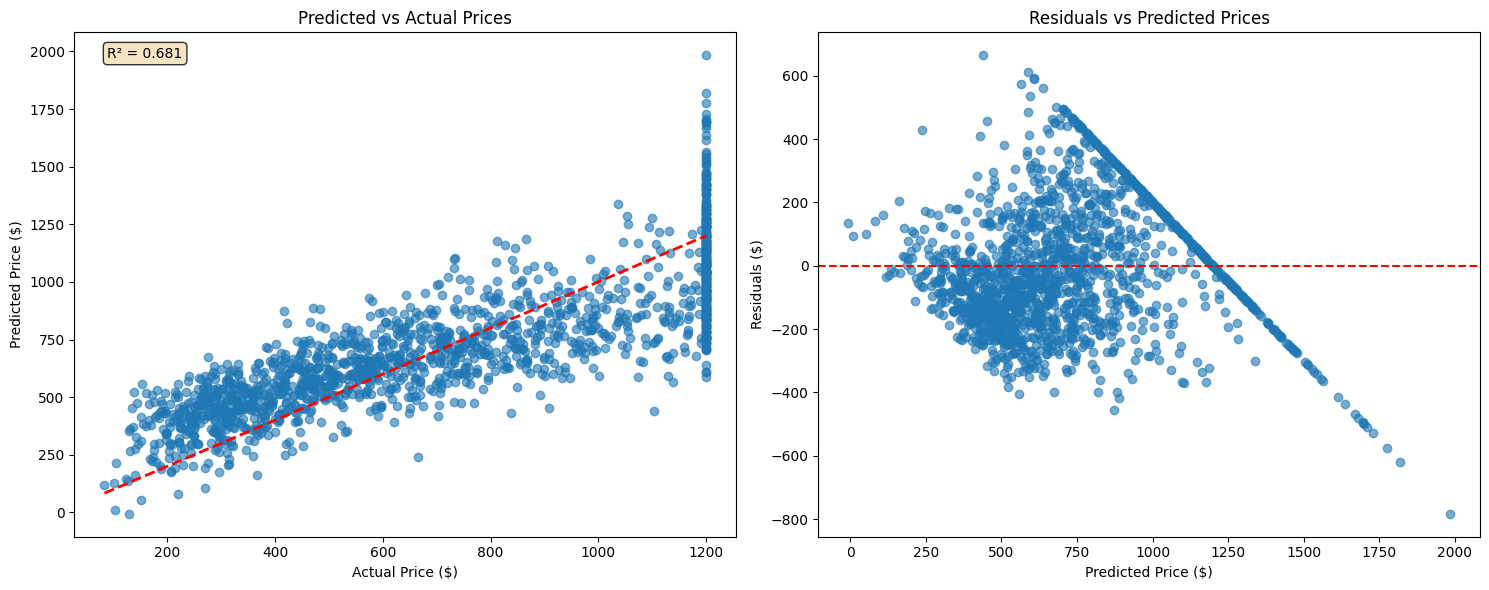

In [ ]:
# Create prediction vs actual plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Predicted vs Actual
axes[0].scatter(y_test_house, y_pred_house, alpha=0.6)
axes[0].plot([y_test_house.min(), y_test_house.max()],
            [y_test_house.min(), y_test_house.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title('Predicted vs Actual Prices')
axes[0].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[0].transAxes,
            bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Residuals plot
residuals = y_test_house - y_pred_house
axes[1].scatter(y_pred_house, residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price ($)')
axes[1].set_ylabel('Residuals ($)')
axes[1].set_title('Residuals vs Predicted Prices')

plt.tight_layout()
plt.show()